In [68]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
df = yf.download('ETH-USD', start = '2016-01-01')

[*********************100%***********************]  1 of 1 completed


In [71]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-03-04,2834.987305,2835.176270,2587.748291,2617.156006,2617.156006,14496939024
2022-03-05,2618.473633,2679.102539,2596.989990,2664.831055,2664.831055,8072368396
2022-03-06,2664.943604,2673.637207,2555.037354,2555.037354,2555.037354,8872976607


In [72]:
def MACD(df):
    df['EMA12'] = df.Close.ewm(span=12).mean()
    df['EMA26'] = df.Close.ewm(span=26).mean()
    df['MACD'] = df.EMA12 - df.EMA26
    df['signal'] = df.MACD.ewm(span=9).mean()
    print('Indicators added')

In [73]:
MACD(df)

Indicators added


In [74]:
df

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,signal
Date,,,,,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,320.884003,320.884003,0.000000,0.000000
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,309.167205,309.652516,-0.485311,-0.269617
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,311.319240,311.459201,-0.139961,-0.216480
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,310.242442,310.466438,-0.223996,-0.219026
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,312.001285,311.915738,0.085548,-0.128422
...,...,...,...,...,...,...,...,...,...,...
2022-03-04,2834.987305,2835.176270,2587.748291,2617.156006,2617.156006,14496939024,2788.935804,2823.841533,-34.905729,-44.400351
2022-03-05,2618.473633,2679.102539,2596.989990,2664.831055,2664.831055,8072368396,2769.842765,2812.062979,-42.220214,-43.964324
2022-03-06,2664.943604,2673.637207,2555.037354,2555.037354,2555.037354,8872976607,2736.795779,2793.024044,-56.228265,-46.417112


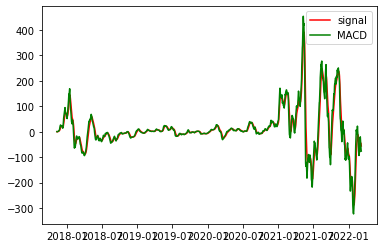

In [75]:
plt.plot(df.signal, label ='signal', color='red')
plt.plot(df.MACD, label ='MACD', color='green')
plt.legend()
plt.show()

In [76]:
Buy, Sell = [],[]

for i in range(2,len(df)):
    if df.MACD.iloc[i] > df.signal.iloc[i] and df.MACD.iloc[i-1] < df.signal.iloc[i-1]:
        Buy.append(i)
    elif df.MACD.iloc[i] < df.signal.iloc[i] and df.MACD.iloc[i-1] > df.signal.iloc[i-1]:
        Sell.append(i)

In [77]:
Buy

[2,
 4,
 32,
 55,
 98,
 109,
 145,
 207,
 222,
 234,
 287,
 310,
 345,
 388,
 456,
 494,
 505,
 543,
 585,
 628,
 649,
 651,
 663,
 698,
 716,
 757,
 775,
 810,
 866,
 931,
 970,
 985,
 1008,
 1027,
 1043,
 1055,
 1064,
 1092,
 1116,
 1134,
 1144,
 1167,
 1182,
 1198,
 1215,
 1237,
 1265,
 1302,
 1313,
 1328,
 1351,
 1392,
 1422,
 1482,
 1490,
 1504,
 1528,
 1543,
 1572]

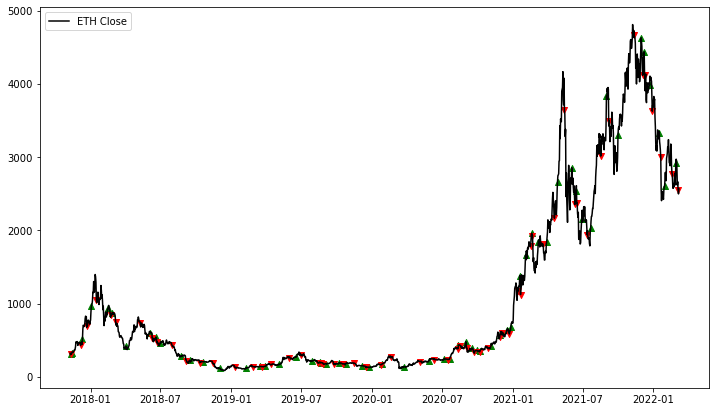

In [87]:
plt.figure(figsize=(12,7))
plt.scatter(df.iloc[Buy].index, df.iloc[Buy].Close, marker='^', color='green')
plt.scatter(df.iloc[Sell].index, df.iloc[Sell].Close, marker='v', color='red')
plt.plot(df.Close, label = 'ETH Close', color='k')
plt.legend()
plt.show()

In [79]:
Sell

[3,
 27,
 45,
 68,
 107,
 118,
 182,
 213,
 226,
 264,
 302,
 336,
 370,
 427,
 475,
 497,
 521,
 567,
 598,
 643,
 650,
 657,
 684,
 707,
 736,
 767,
 807,
 834,
 909,
 945,
 980,
 1006,
 1013,
 1029,
 1047,
 1063,
 1085,
 1115,
 1122,
 1140,
 1163,
 1169,
 1195,
 1199,
 1227,
 1257,
 1283,
 1310,
 1316,
 1342,
 1377,
 1399,
 1464,
 1486,
 1491,
 1511,
 1533,
 1563,
 1578]

In [80]:
TrueBuys = [i+1 for i in Buy]
TrueSells = [i+1 for i in Sell]

In [81]:
BuyPrices = df.Open.iloc[TrueBuys]
SellPrices = df.Open.iloc[TrueSells]

In [82]:
BuyPrices

Date
2017-11-12     314.690002
2017-11-14     316.763000
2017-12-12     522.286011
2018-01-04     961.713013
2018-02-16     934.786011
2018-02-27     870.364990
2018-04-04     416.484985
2018-06-05     593.406006
2018-06-20     538.505981
2018-07-02     453.824005
2018-08-24     278.110992
2018-09-16     222.802994
2018-10-21     205.389999
2018-12-03     116.378761
2019-02-09     119.214111
2019-03-19     139.254013
2019-03-30     142.359146
2019-05-07     172.427277
2019-06-18     274.320251
2019-07-31     210.492416
2019-08-21     196.621689
2019-08-23     191.106873
2019-09-04     179.491989
2019-10-09     182.036301
2019-10-27     179.932632
2019-12-07     149.197601
2019-12-25     129.068497
2020-01-29     176.347885
2020-03-25     138.914963
2020-05-29     219.925049
2020-07-07     240.972595
2020-07-22     245.037262
2020-08-14     428.677277
2020-09-02     477.007874
2020-09-18     389.337494
2020-09-30     360.038513
2020-10-09     351.112885
2020-11-06     414.066711
2020-11

In [83]:
if SellPrices.index[0] < BuyPrices.index[0]:
    SellPrices = SellPrices.drop(SellPrices.index[0])
elif BuyPrices.index[-1] > SellPrices.index[-1]:
    BuyPrices = BuyPrices.drop(BuyPrices.index[-1])

In [84]:
profitsrel = []

for i in range(len(SellPrices)):
    profitsrel.append(SellPrices[i] - BuyPrices[i]/BuyPrices[i])

In [85]:
profitsrel

[306.0249938964844,
 425.3689880371094,
 697.8699951171875,
 1060.3399658203125,
 838.458984375,
 751.5700073242188,
 726.0130004882812,
 523.8569946289062,
 473.76800537109375,
 432.8689880371094,
 216.91200256347656,
 187.70700073242188,
 180.8990020751953,
 126.81396484375,
 135.2830810546875,
 135.562255859375,
 166.89747619628906,
 255.0152587890625,
 289.26849365234375,
 185.68350219726562,
 185.9412384033203,
 172.9586944580078,
 167.13357543945312,
 176.98855590820312,
 179.4990997314453,
 132.64718627929688,
 160.17681884765625,
 264.55157470703125,
 202.91285705566406,
 230.62545776367188,
 232.69139099121094,
 379.0638122558594,
 422.73858642578125,
 383.671630859375,
 340.72381591796875,
 341.0446472167969,
 385.7302551269531,
 537.2645874023438,
 595.5686645507812,
 583.1356201171875,
 1170.443115234375,
 1117.8890380859375,
 1780.35009765625,
 1917.673095703125,
 1811.6065673828125,
 2160.939453125,
 3640.830810546875,
 2353.752197265625,
 2373.5869140625,
 1940.167846679

In [86]:
pd.DataFrame(profitsrel).mean()

0    1114.714718
dtype: float64